### Import libraries 

In [1]:
# Importing required Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white')

### Load data 

In [2]:
# Read data
train =  pd.read_csv("loan_train.csv")

In [3]:
train.shape

(614, 13)

In [5]:
# Features in the dataset
train.columns

Index(['LoanID', 'Gender', 'Married', 'Dependents', 'Education',
       'SelfEmployed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'LoanAmountTerm', 'CreditHistory', 'PropertyArea', 'LoanStatus'],
      dtype='object')

### Understand data 

In [6]:
train.head()

,LoanID,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm,CreditHistory,PropertyArea,LoanStatus
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LoanID             614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   SelfEmployed       582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   LoanAmountTerm     600 non-null    float64
 10  CreditHistory      564 non-null    float64
 11  PropertyArea       614 non-null    object 
 12  LoanStatus         614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm,CreditHistory
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
train.describe(include='all')

,LoanID,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm,CreditHistory,PropertyArea,LoanStatus
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP002337,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


## Univariate Analysis

### Univariate Analysis for Categorical Variables 

In [10]:
train['LoanStatus'].value_counts()

Y    422
N    192
Name: LoanStatus, dtype: int64

In [11]:
# Normalize can be set to True to print proportions instead of number 
train['LoanStatus'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: LoanStatus, dtype: float64

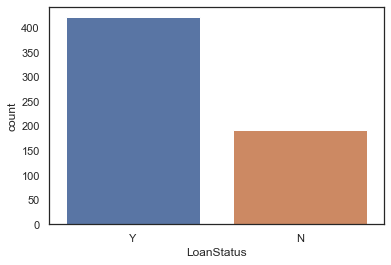

In [12]:
# Bar graph for loan_status
sns.countplot(x="LoanStatus", data=train)

In [13]:
train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [14]:
# count number of null values 
train['Gender'].isnull().sum()

13

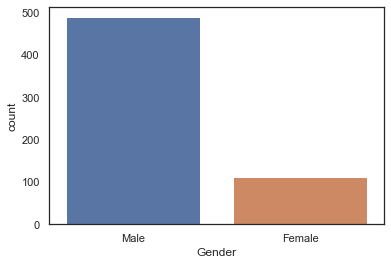

In [15]:
# Bar Graph for Gender
sns.countplot(x="Gender",data=train)

In [16]:
train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [17]:
train['Dependents'].isna().sum()

15

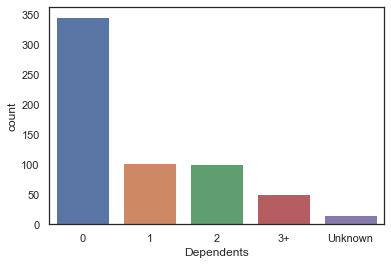

In [18]:
# Bar graph for dependents 
sns.countplot(train['Dependents'].fillna('Unknown'))

In [19]:
train['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

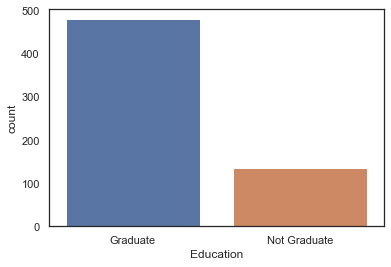

In [20]:
sns.countplot("Education", data=train)

In [62]:
train['SelfEmployed'].value_counts()

No     500
Yes     82
Name: SelfEmployed, dtype: int64

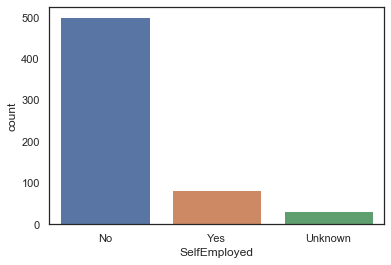

In [22]:
# Bar graph of SelfEmployed
sns.countplot(train['SelfEmployed'].fillna('Unknown'))

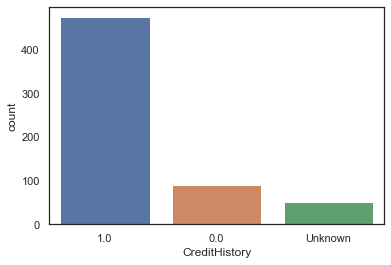

In [23]:
# Bar graph of Credit_History
sns.countplot(train.CreditHistory.fillna('Unknown'))

In [65]:
train['CreditHistory'].fillna('Unknown').value_counts(normalize=True)

1.0        0.773616
0.0        0.144951
Unknown    0.081433
Name: CreditHistory, dtype: float64

In [66]:
train['PropertyArea'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: PropertyArea, dtype: int64

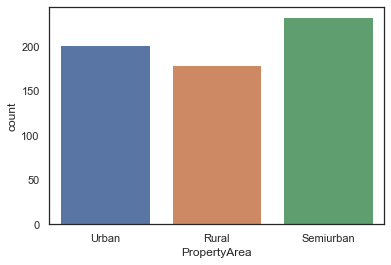

In [67]:
# Bar graph of Property_Area
sns.countplot(x='PropertyArea',data=train)

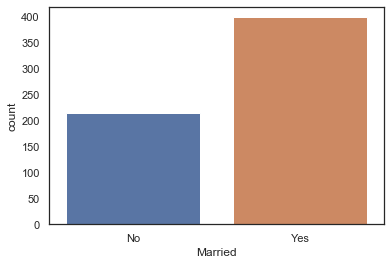

In [68]:
# Bar Graph for Married
sns.countplot(x="Married",data=train)

In [69]:
train.pivot_table(columns="Married",index="Dependents", values="LoanID", aggfunc=len)

Married,No,Yes
Dependents,,
0,171,174
1,23,79
2,8,93
3+,7,44


In [70]:
print(train['SelfEmployed'].isnull().sum())   # Missing count 
print(train['Gender'].isnull().sum())   # Missing count 
print(train['Married'].isnull().sum())   # Missing count 
print(train['CreditHistory'].isnull().sum())   # Missing count 
print(train['Dependents'].isnull().sum())   # Missing count 
print(train['PropertyArea'].isnull().sum())   # Missing count 
print(train['Education'].isnull().sum())   # Missing count 

32
13
3
50
15
0
0


###  Univariate Analysis for Continous Variables 

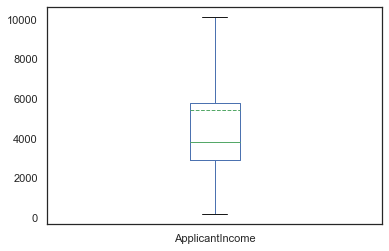

In [27]:
# Visualizing numerical features
#plt.gcf().set_size_inches(5,8)
train.ApplicantIncome.plot.box(showfliers=False, meanline=True, showmeans = True)
# sns.boxplot(x="ApplicantIncome",data=train, orient='vertical', showfliers=False, meanline=True, showmeans=True)

#### Display how many outliers in ApplicantIncome 

In [72]:
app_income = train["ApplicantIncome"]

In [73]:
q1,q2,q3 = app_income.quantile([0.25,0.5,0.75])
print(q1,q2,q3)

2877.5 3812.5 5795.0


In [74]:
iqr = q3 - q1

In [75]:
iqr

2917.5

In [76]:
print("Upper Limit     : ", (q3 + 1.5 * iqr))
print("Lower Limit     : ", (q1 - 1.5 * iqr))
print("Higher outliers : ", (app_income > (q3 + 1.5 * iqr)).sum())
print("Lower  outliers : ", (app_income < (q1 - 1.5 * iqr)).sum())

Upper Limit     :  10171.25
Lower Limit     :  -1498.75
Higher outliers :  50
Lower  outliers :  0


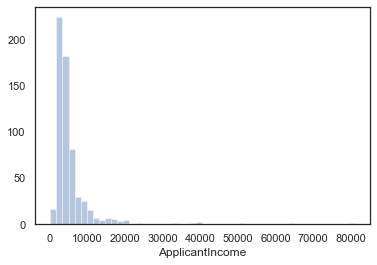

In [77]:
sns.distplot(train.ApplicantIncome, kde=False)

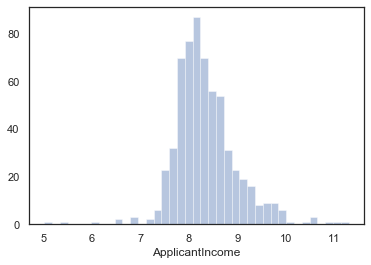

In [28]:
sns.distplot(np.log(train.ApplicantIncome), kde=False)  # After log transformation 

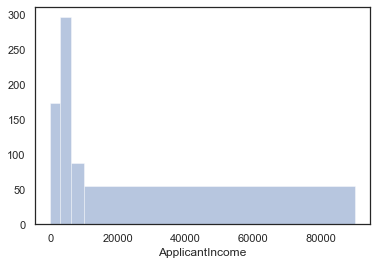

In [29]:
sns.distplot(train["ApplicantIncome"],bins=[0,3000,6000,10000,90000],kde=False)    # Histogram
# plt.gcf().set_size_inches(10,5)

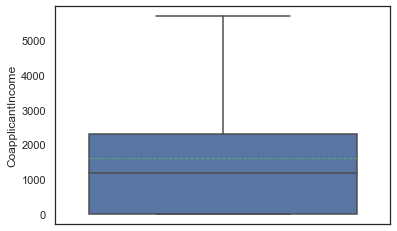

In [32]:
sns.boxplot(x="CoapplicantIncome",data=train, orient='vertical', showmeans=True, meanline=True, showfliers = False)

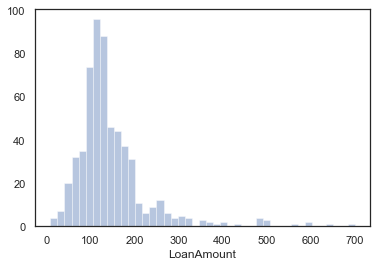

In [33]:
sns.distplot(train.LoanAmount, kde=False)

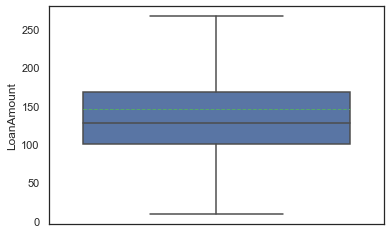

In [35]:
sns.boxplot(train["LoanAmount"], orient='vertical', showfliers = False, meanline=True, showmeans= True)
#plt.gcf().set_size_inches(20,8)

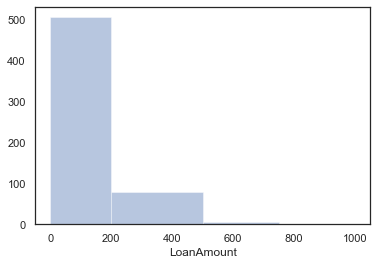

In [36]:
sns.distplot(train['LoanAmount'], bins=[0,200,500,750,1000], kde=False)

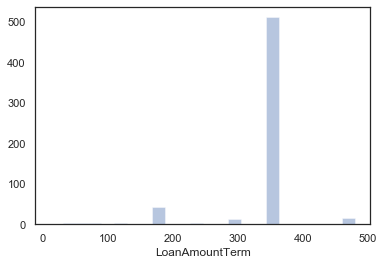

In [37]:
sns.distplot(train["LoanAmountTerm"], kde=False)

In [38]:
# Convert months to years and displays dist
(train.LoanAmountTerm / 12).value_counts()

30.0    512
15.0     44
40.0     15
25.0     13
7.0       4
20.0      4
10.0      3
3.0       2
5.0       2
1.0       1
Name: LoanAmountTerm, dtype: int64

##  Bivariate Ananlysis

In [40]:
property_group = train.pivot_table(index='PropertyArea',columns="LoanStatus", values='LoanID',aggfunc=len)

In [87]:
property_group

LoanStatus,N,Y
PropertyArea,,
Rural,69,110
Semiurban,54,179
Urban,69,133


In [88]:
train.PropertyArea.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: PropertyArea, dtype: int64

In [90]:
# Rejection rate 
property_group.iloc[:,0] / (property_group.iloc[:,0] + property_group.iloc[:,1])

PropertyArea
Rural        0.385475
Semiurban    0.231760
Urban        0.341584
dtype: float64

In [91]:
train.groupby(['PropertyArea','LoanStatus'])['LoanID'].count()

PropertyArea  LoanStatus
Rural         N              69
              Y             110
Semiurban     N              54
              Y             179
Urban         N              69
              Y             133
Name: LoanID, dtype: int64

In [92]:
train.groupby(['Gender','Education'], as_index=False)['ApplicantIncome'].mean()

,Gender,Education,ApplicantIncome
0,Female,Graduate,4646.467391
1,Female,Not Graduate,4629.700000
2,Male,Graduate,5992.345745
3,Male,Not Graduate,3630.061947


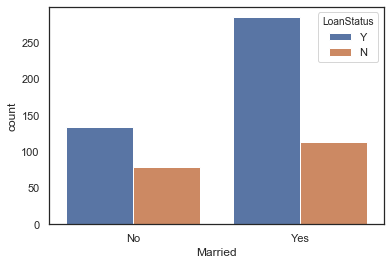

In [42]:
# d = train.groupby(by=["LoanStatus","Married"], as_index=False)['LoanID'].count()
# print(d)
# sns.catplot(x="Married",y="LoanID", hue="LoanStatus", data=d, kind="bar")
sns.countplot(x="Married", data = train, hue="LoanStatus")

In [94]:
train.pivot_table(index = "Married", columns="LoanStatus", values='LoanID',aggfunc=len)

LoanStatus,N,Y
Married,,
No,79,134
Yes,113,285


In [95]:
# Married vs. Unmarried rejection rates
113 / (285 + 113),  79 / (79 + 134)

(0.28391959798994976, 0.37089201877934275)

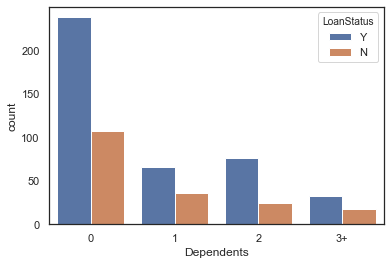

In [45]:
# d = train.groupby(by=["LoanStatus","Dependents"], as_index=False)['LoanID'].count()
# print(d)
sns.countplot(x="Dependents", hue="LoanStatus", data=train)

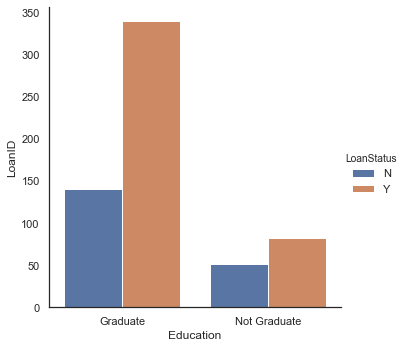

In [97]:
d = train.groupby(by=["LoanStatus","Education"], as_index=False)['LoanID'].count()
sns.catplot(x="Education",y="LoanID", hue="LoanStatus", data=d, kind="bar")

  LoanStatus SelfEmployed  LoanID
0          N           No     157
1          N          Yes      26
2          Y           No     343
3          Y          Yes      56


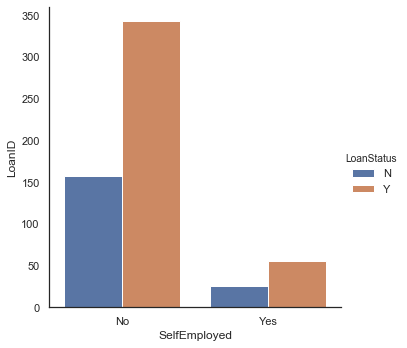

In [98]:
d = train.groupby(by=["LoanStatus","SelfEmployed"], as_index=False)['LoanID'].count()
print(d)
sns.catplot(x="SelfEmployed",y="LoanID", hue="LoanStatus", data=d, kind="bar")

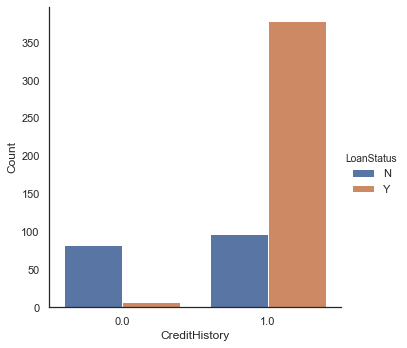

In [99]:
d = train.groupby(by=["LoanStatus","CreditHistory"], as_index=False)['LoanID'].count()
d.rename(columns={'LoanID':'Count'}, inplace=True)
sns.catplot(x="CreditHistory",y="Count", hue="LoanStatus", data=d, kind="bar")

  LoanStatus PropertyArea  Count
0          N        Rural     69
1          N    Semiurban     54
2          N        Urban     69
3          Y        Rural    110
4          Y    Semiurban    179
5          Y        Urban    133


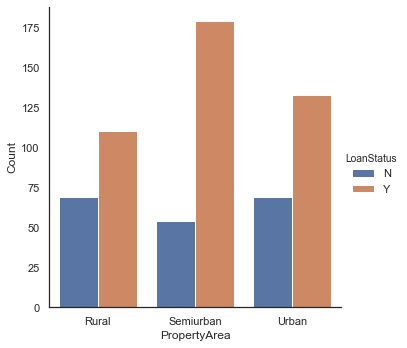

In [100]:
d = train.groupby(by=["LoanStatus","PropertyArea"], as_index=False)['LoanID'].count()
d.rename(columns={'LoanID':'Count'}, inplace=True)
print(d)
sns.catplot(x="PropertyArea",y="Count", hue="LoanStatus", data=d, kind='bar')

  LoanStatus  Gender  LoanID
0          N  Female      37
1          N    Male     150
2          Y  Female      75
3          Y    Male     339


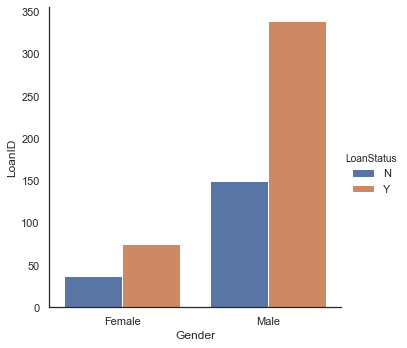

In [101]:
d = train.groupby(by=["LoanStatus","Gender"], as_index=False)['LoanID'].count()
print(d)
sns.catplot(x="Gender",y="LoanID", hue="LoanStatus", data=d, kind="bar")

In [4]:
# Making bins for Applicant income variable
bins=[0,2500,4000,6000,85000]
group=['Low','Average','High', 'Very high']
# Create a new column for income bin  
train['IncomeBin']= pd.cut(train['ApplicantIncome'],bins,labels=group)

In [5]:
train[['ApplicantIncome','IncomeBin']].sample(10)

,ApplicantIncome,IncomeBin
387,3010,Average
301,2875,Average
586,2297,Low
188,674,Low
214,3173,Average
302,5000,High
334,9833,Very high
158,2980,Average
282,2301,Low
3,2583,Average


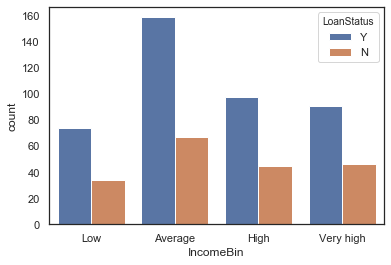

In [6]:
sns.countplot(x="IncomeBin", hue="LoanStatus", data=train)

In [7]:
# Making bins for LoanAmount variable
bins=[0,100,200,700]
group=['Low','Average','High']
train['LoanAmountBin']=pd.cut(train['LoanAmount'],bins,labels=group)
train[['LoanAmount','LoanAmountBin']].head(10)

,LoanAmount,LoanAmountBin
0,NaN,NaN
1,128.0,Average
2,66.0,Low
3,120.0,Average
4,141.0,Average
5,267.0,High
6,95.0,Low
7,158.0,Average
8,168.0,Average
9,349.0,High


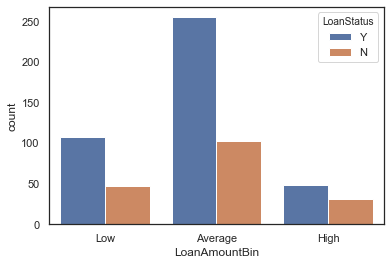

In [9]:
sns.countplot(x="LoanAmountBin", hue="LoanStatus", data=train)

### Bivariate for continuous variables 

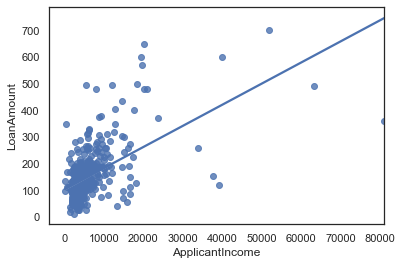

In [10]:
sns.regplot(x="ApplicantIncome", y = "LoanAmount", data = train,ci=False)

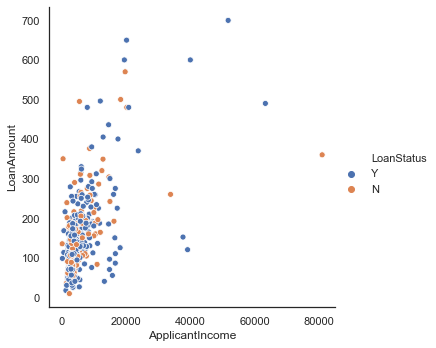

In [11]:
sns.relplot(x="ApplicantIncome", y = "LoanAmount", hue='LoanStatus',data = train)

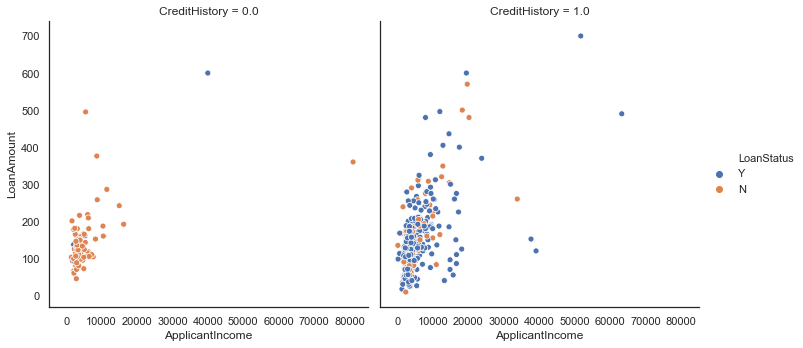

In [13]:
sns.relplot(x="ApplicantIncome", y = "LoanAmount", hue='LoanStatus',col='CreditHistory',data = train)

####  Take CoApplicantIncome and compare with loan amount and Gender

In [110]:
train.columns

Index(['LoanID', 'Gender', 'Married', 'Dependents', 'Education',
       'SelfEmployed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'LoanAmountTerm', 'CreditHistory', 'PropertyArea', 'LoanStatus',
       'IncomeBin', 'CoapplicantIncomeBin', 'LoanAmountBin'],
      dtype='object')

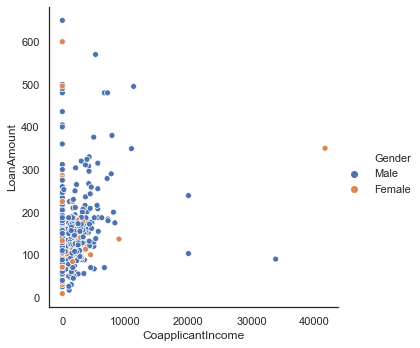

In [111]:
sns.relplot(x="CoapplicantIncome", y = "LoanAmount", hue='Gender',data = train,ci=False)

## Data Wrangling 

In [15]:
# Drop the new variable of bins
train.drop(['IncomeBin', 'LoanAmountBin'], axis=1, inplace=True)

In [16]:
train.head()

,LoanID,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm,CreditHistory,PropertyArea,LoanStatus
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#### Dependents 

In [114]:
train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [17]:
# replacing 3+ in Dependents variable with 3
train['Dependents'].replace(to_replace ='3+', value='3',inplace=True)

In [116]:
train['Dependents'].value_counts()

0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64

#### Loan_Status

In [18]:
# replacing Y and N in Loan_Status variable with 1 and 0 respectively
train['LoanStatus'].replace(to_replace =['N','Y'], value=[0,1],inplace=True)

### Missing value and outlier treatment

In [19]:
# Checking the missing values
s = train.isnull().sum()
s [ s > 0]

Gender            13
Married            3
Dependents        15
SelfEmployed      32
LoanAmount        22
LoanAmountTerm    14
CreditHistory     50
dtype: int64

In [20]:
# replacing the missing values with the mode
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)

In [21]:
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['SelfEmployed'].fillna(train['SelfEmployed'].mode()[0], inplace=True)

In [22]:
# Drop rows where credit history is null 
train = train[train.CreditHistory.notnull()]

In [23]:
train.shape

(564, 13)

In [24]:
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)

C:\Anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [25]:
train['LoanAmountTerm'].fillna(train['LoanAmountTerm'].mode()[0], inplace=True)

In [123]:
train.LoanAmount.median(), train.LoanAmount.mean()

(128.0, 146.41216216216216)

In [26]:
# Replace missing values
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [27]:
train.isnull().sum()

LoanID               0
Gender               0
Married              0
Dependents           0
Education            0
SelfEmployed         0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
LoanAmountTerm       0
CreditHistory        0
PropertyArea         0
LoanStatus           0
dtype: int64

## Handle outliers in LoanAmount, ApplicantIncome, CoApplicantIncome 

In [28]:
train['Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


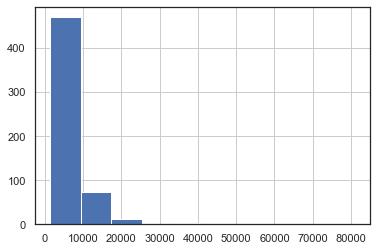

In [29]:
train['Income'].hist(bins=10)

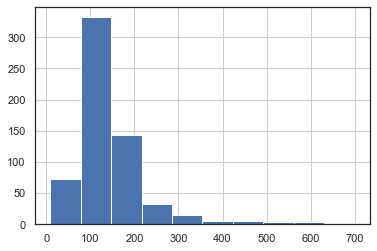

In [128]:
train['LoanAmount'].hist(bins=10)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


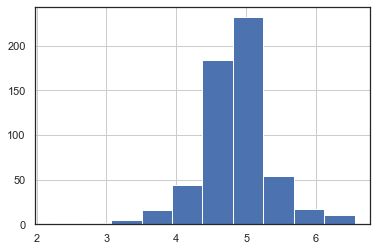

In [30]:
# Removing skewness in LoanAmount variable by log transformation
train['LoanAmountLog'] = np.log(train['LoanAmount'])
train['LoanAmountLog'].hist(bins=10)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


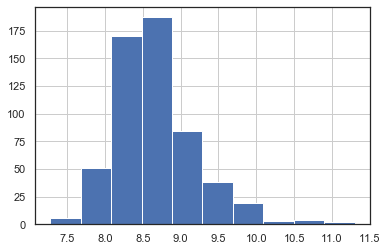

In [31]:
# Removing skewness in Income variable by log transformation
train['IncomeLog'] = np.log(train['Income'])
train['IncomeLog'].hist(bins=10)

In [32]:
train.drop(['LoanID','LoanAmount','ApplicantIncome','CoapplicantIncome','Income'],axis=1,inplace=True)

C:\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564 entries, 0 to 613
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          564 non-null    object 
 1   Married         564 non-null    object 
 2   Dependents      564 non-null    object 
 3   Education       564 non-null    object 
 4   SelfEmployed    564 non-null    object 
 5   LoanAmountTerm  564 non-null    float64
 6   CreditHistory   564 non-null    float64
 7   PropertyArea    564 non-null    object 
 8   LoanStatus      564 non-null    int64  
 9   LoanAmountLog   564 non-null    float64
 10  IncomeLog       564 non-null    float64
dtypes: float64(4), int64(1), object(6)
memory usage: 52.9+ KB


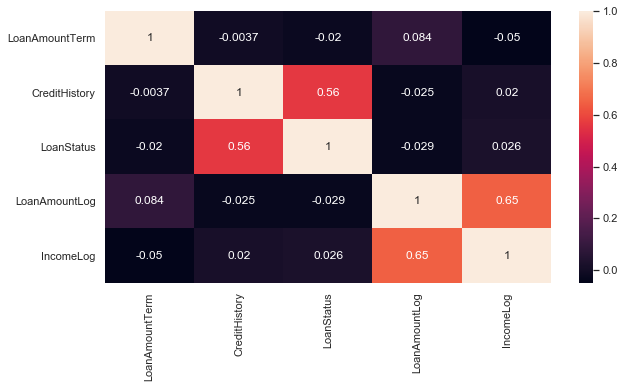

In [36]:
# Print correlation matrix to understand relationship between variables
matrix = train.corr()
# print(matrix)
sns.heatmap(matrix, annot=True)
plt.gcf().set_size_inches(10,5)

In [37]:
# Save dataframe
train.to_csv("final_train.csv",index=False)